# Inteligentná analýza údajov
## Zadanie 1 - labor.csv
### Michal Greguš, Samuel Kováč

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms

data = pd.read_csv("data/labor.csv", sep = '\t')

## 1.Základný opis dát spolu s ich charakteristikami

Dataset obsahuje informácie o laboratórnych výsledkoch osôb, pričom pre niektoré osoby je zaznamenaných aj viacero laboratórnych záznamov.

Tento dataset obsahuje laboratórne výsledky osôb(ktoré sú v datasete Profiles), medzi sledované atribúty patria napríklad  medicínske hodnoty ako hladina erytrocytov, leukocitov, trombocytov, hemoglobínu a iné, ale aj demografické informácie ako vzťahový status. 

V datasetoch Labor a Profiles sa vyskytujú dva spoločné atribúty a to **name** a **ssn**. *Pričom v datasete Profiles je ssn jednoznačný identifikátor záznamu*. Na základe kombinácie týchto dvoch atribútov možno v oboch datasetoch jednoznačne identifikovať konkrétnu osobu ku ktorej záznamy patria. Podľa týchto dvoch atribútov preto budeme dané datasety aj spájať v ďalšej fáze zadania.

In [2]:
data.head()

,Unnamed: 0,leukocyty,weight,hbver,er-cv,ast,indicator,hematokrit,trombocyty,name,smoker,ssn,alt,etytr,erytrocyty,hemoglobin,alp,relationship
0,0,5.86641,72.15664,7.47768,28.38607,38.72133,1.0,8.96306,5.54324,Mr. Andrew Webster Jr.,no,129-57-1271,5.22897,5.41309,5.81047,6.92884,75.92323,widowed
1,1,4.83778,85.95601,7.41751,41.27266,36.95488,1.0,7.85628,6.04889,Zachary Smith,Y,498-81-0776,4.31739,6.23896,5.09420,5.57135,77.02905,divoced
2,2,4.24648,94.50864,4.90480,55.29153,45.54332,0.0,4.23485,8.37975,Nathan Patterson,Y,506-31-1710,4.87192,7.95260,6.16327,6.42330,88.22852,separated
3,3,3.51224,71.79143,6.69697,49.57050,41.03553,1.0,6.92955,3.40055,Jessica Mahoney,no,366-34-0591,2.77137,3.48445,5.24063,6.28255,90.44713,divoced
4,4,7.78402,49.57289,6.45086,28.69475,40.47976,1.0,6.39201,4.11305,Damon Gardner,no,774-03-4511,6.13950,4.58816,4.01041,5.63217,72.61973,divoced


Prvý nepomenovaný stĺpec je vlastne index záznamov, môžme ho odstrániť.

In [3]:
data = data.drop(data.columns[0],axis=1)

### Počet záznamov a atribútov

In [4]:
print('Počet záznamov : ',data.shape[0] , '\nPočet atribútov: ', data.shape[1])

Počet záznamov :  10007 
Počet atribútov:  17


Dataset obsahuje nasledovné atribúty

In [5]:
data.columns

Index(['leukocyty', 'weight', 'hbver', 'er-cv', 'ast', 'indicator',
       'hematokrit', 'trombocyty', 'name', 'smoker', 'ssn', 'alt', 'etytr',
       'erytrocyty', 'hemoglobin', 'alp', 'relationship'],
      dtype='object')

Po odstránení nepomenovaného atribútu nám teda zostalo **16 atribútov** pre **10007 záznamov**, môžme si to overiť pomocou *data.tail()* :

In [6]:
data.tail()

,leukocyty,weight,hbver,er-cv,ast,indicator,hematokrit,trombocyty,name,smoker,ssn,alt,etytr,erytrocyty,hemoglobin,alp,relationship
10002,8.91035,42.57034,5.94948,57.29869,49.06355,0.0,5.48800,8.40368,John Martinez,no,747-25-9283,8.56941,6.64066,7.30652,7.32053,69.97819,divoced
10003,5.43767,66.36027,7.01633,54.57172,36.53053,1.0,7.41436,5.12813,Ashlee Kim,Y,555-25-5236,11.16313,5.51543,7.07517,6.06763,85.85410,married
10004,3.90526,41.06245,6.33809,29.17326,52.83783,1.0,8.79863,5.32157,Michael Li,Y,063-42-5854,2.52502,4.91831,4.08292,7.15075,68.55064,married
10005,8.57059,102.28325,7.25507,29.84087,32.26211,0.0,4.28270,8.63965,Michael Gardner,no,187-94-2566,4.17389,7.13355,6.60108,7.03945,73.80523,separated
10006,5.64340,145.84518,6.16882,77.92485,55.87721,0.0,6.62734,9.98759,Melissa Roman,no,576-67-0305,6.95528,6.74675,6.70380,6.82865,84.37122,divoced


Dataset obsahuje záznamy s chýbajúcimi hodnotami atribútov

In [7]:
data.isnull().sum()

leukocyty       31
weight           0
hbver           31
er-cv           30
ast             30
indicator        0
hematokrit      30
trombocyty      30
name             0
smoker           0
ssn              0
alt             31
etytr           30
erytrocyty      31
hemoglobin      30
alp             30
relationship     0
dtype: int64

In [8]:
print("Celkovo obsahuje %s záznamov v ktorých chýba hodnota aspoň jedného atribútu"%str(data.shape[0] - data.dropna().shape[0]))

Celkovo obsahuje 332 záznamov v ktorých chýba hodnota aspoň jedného atribútu


Môžme si všimnúť že dataset obsahuje 99 duplicitných záznamov.

In [9]:
data.duplicated().sum()

99

Duplicitné záznamy odstránime príkazom *drop_duplicates()*

In [10]:
data.drop_duplicates(keep='first', inplace=True)

In [11]:
data.duplicated().sum()

0

Celkovo sa však v tomto datasete sa už vyskytuje aj niekoľko laboratórnych záznamov pre 1 osobu.

In [12]:
print('Počet záznamov : ',data.shape[0] , '\nPočet testovaných osôb: ',  data[['ssn', 'name']].drop_duplicates().shape[0])

Počet záznamov :  9908 
Počet testovaných osôb:  3092


### Dátové typy
Dátové typy sú pridelené sprvne, všetky desatinné čísla sú typu float a ostatné atribúty ako napríklad *name* a *relationship* sú klasické objekty typu string

In [13]:
data.dtypes

leukocyty       float64
weight          float64
hbver           float64
er-cv           float64
ast             float64
indicator       float64
hematokrit      float64
trombocyty      float64
name             object
smoker           object
ssn              object
alt             float64
etytr           float64
erytrocyty      float64
hemoglobin      float64
alp             float64
relationship     object
dtype: object

### Deskriptívne štatistiky významných atribútov


In [14]:
data.describe(include="all")

,leukocyty,weight,hbver,er-cv,ast,indicator,hematokrit,trombocyty,name,smoker,ssn,alt,etytr,erytrocyty,hemoglobin,alp,relationship
count,9878.000000,9908.000000,9878.000000,9878.000000,9878.000000,9908.000000,9878.000000,9878.000000,9908,9908,9908,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9908
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3038,4,3092,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert Smith,no,113-72-6499,NaN,NaN,NaN,NaN,NaN,married
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,5444,4,NaN,NaN,NaN,NaN,NaN,2571
mean,6.793018,70.005749,6.793715,48.350437,49.307390,0.645337,6.369656,6.426925,NaN,NaN,NaN,8.945878,6.032210,6.797049,6.784296,68.515482,NaN
std,1.525011,34.909530,1.001156,14.136543,12.752349,0.478435,1.591608,1.722116,NaN,NaN,NaN,5.862432,1.502904,1.006155,1.007876,20.352373,NaN
min,0.997910,-72.655610,2.363630,0.000000,0.000000,0.000000,1.172700,0.000000,NaN,NaN,NaN,0.000000,1.027910,2.891940,2.478430,0.000000,NaN
25%,5.613833,47.074018,6.115040,38.912355,40.636725,0.000000,5.175528,5.191125,NaN,NaN,NaN,5.727078,5.047092,6.128460,6.100168,58.226145,NaN
50%,6.993640,69.480125,6.785165,48.300335,49.249260,1.000000,6.315170,6.337080,NaN,NaN,NaN,7.528915,5.864550,6.805760,6.777290,75.625600,NaN
75%,8.016868,93.613275,7.467605,57.923047,57.963300,1.000000,7.587845,7.636613,NaN,NaN,NaN,10.220637,6.848598,7.481435,7.450075,83.710870,NaN


### Atribút weight

In [15]:
data.weight.describe()

count    9908.000000
mean       70.005749
std        34.909530
min       -72.655610
25%        47.074018
50%        69.480125
75%        93.613275
max       192.049500
Name: weight, dtype: float64

In [16]:
print('Počet chýbajúcich záznamov : ', data.shape[0] - data.weight.count())

Počet chýbajúcich záznamov :  0


Z príkazu *describe* vidíme že atribút **weight** je typu float, a tiež vidíme že nechýbajú žiadne záznamy.

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribúcia váhy pacientov zobrazená boxplotom')

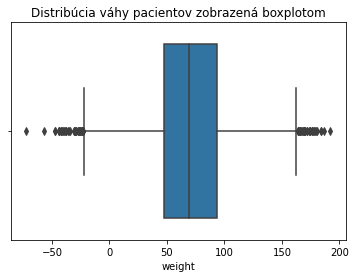

In [17]:
sns.boxplot(data.weight).set_title('Distribúcia váhy pacientov zobrazená boxplotom')

Text(0.5, 1.0, 'Distribúcia váhy pacientov zobrazená histogramom')

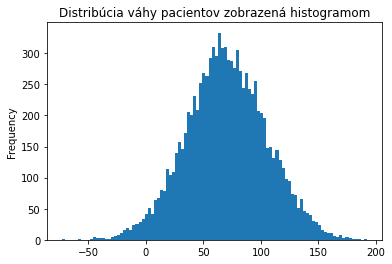

In [18]:
data.weight.plot(kind='hist', bins=100).set_title('Distribúcia váhy pacientov zobrazená histogramom')

Z daných grafov môžme vidieť niektoré chybné údaje ako napríklad záporné hodnoty váhy.

### Atribút smoker

In [19]:
data.smoker.describe()

count     9908
unique       4
top         no
freq      5444
Name: smoker, dtype: object

In [20]:
data.smoker.unique()

array(['no', 'Y', 'yes', 'N'], dtype=object)

In [21]:
print('Počet chýbajúcich záznamov : ', data.shape[0] - data.smoker.count())

Počet chýbajúcich záznamov :  0


Z príkazu *describe* vidíme že atribút **smoker** je typu string, tiež vidíme že nechýbajú žiadne záznamy, a vidíme aj všetky typy záznamov tohto atribútu. Jedná sa o kategorický atribút.

Text(0.5, 1.0, 'Záznamy atribútu smoker zobrazené stĺpcovým grafom')

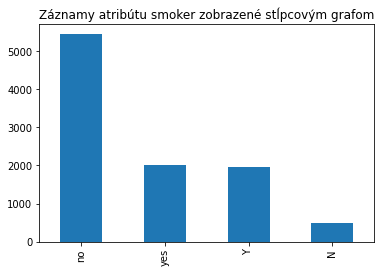

In [22]:
data.smoker.value_counts().plot.bar().set_title('Záznamy atribútu smoker zobrazené stĺpcovým grafom')

Problémom týchto záznamov je používanie rôznych označení odpovedí (**yes/no**, **Y/N**). Problém sa dá vyriešiť prekonvertovaním na jednu formu odpovedí.

### Atribút relationship

In [23]:
data.relationship.describe()

count        9908
unique          6
top       married
freq         2571
Name: relationship, dtype: object

In [24]:
data.relationship.unique()

array(['widowed', 'divoced', 'separated', 'married', 'single', 'nop'],
      dtype=object)

In [25]:
print('Počet chýbajúcich záznamov : ', data.shape[0] - data.relationship.count())

Počet chýbajúcich záznamov :  0


Z príkazu *describe* vidíme že atribút **relationship** je typu string, tiež vidíme že nechýbajú žiadne záznamy, a vidíme aj všetky typy záznamov tohto atribútu. Jedná sa o kategorický atribút.

Text(0.5, 1.0, 'Záznamy atribútu relationship zobrazené stĺpcovým grafom')

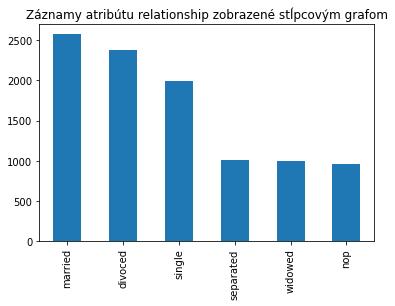

In [26]:
data.relationship.value_counts().plot.bar().set_title('Záznamy atribútu relationship zobrazené stĺpcovým grafom')

Z daného grafu môžme vidieť že najviac **relationship** záznamov je **married**

### Atribút leukocyty

In [27]:
data.leukocyty.describe()

count    9878.000000
mean        6.793018
std         1.525011
min         0.997910
25%         5.613833
50%         6.993640
75%         8.016868
max        10.690800
Name: leukocyty, dtype: float64

Atribút **leukocyty** je spojitý číselný atribút typu float.

In [28]:
print('Počet chýbajúcich záznamov : ', data.shape[0] - data.leukocyty.count())

Počet chýbajúcich záznamov :  30


C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribúcia atribútu leukocyty zobrazená boxplot grafom')

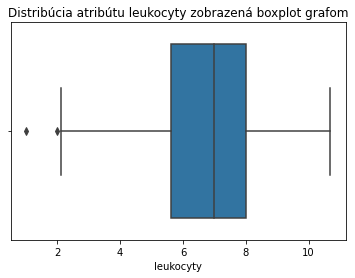

In [29]:
sns.boxplot(data.leukocyty).set_title('Distribúcia atribútu leukocyty zobrazená boxplot grafom')

Z boxplot grafu si môžme všimnút veľmi malý počet outlinerov, čo znamená že väčšina záznamov je orientovaná okolo mediánu 6.8

### Atribút hematokrit

Atribút **hematokrit** označuje pomer medzi objemom bunkovej časti krvi (teda najmä erytrocytov) a objemom celej krvi. Jedná sa o spojitý číselný atribút.

In [30]:
data.hematokrit.describe()

count    9878.000000
mean        6.369656
std         1.591608
min         1.172700
25%         5.175528
50%         6.315170
75%         7.587845
max        11.187870
Name: hematokrit, dtype: float64

Atribút **hematokrit** je typu float a obsahuje 30 prázdnych záznamov.

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribúcia atribútu hematokrit zobrazená boxplot grafom')

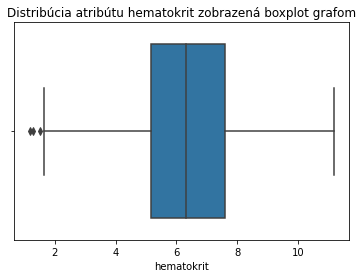

In [31]:
sns.boxplot(data.hematokrit).set_title('Distribúcia atribútu hematokrit zobrazená boxplot grafom')

Z boxplotu môžme vidieť že obsahuje len malé množstvo *outlierov*

Text(0.5, 1.0, 'Záznamy atribútu hematokrit zobrazené histogramom')

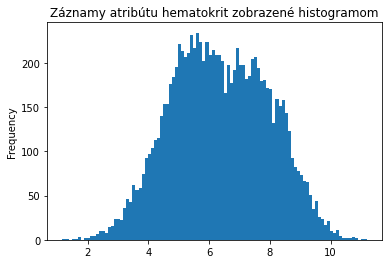

In [32]:
data.hematokrit.plot(kind='hist', bins=100).set_title('Záznamy atribútu hematokrit zobrazené histogramom')

### Atribút trombocyty

In [33]:
data.trombocyty.describe()

count    9878.000000
mean        6.426925
std         1.722116
min         0.000000
25%         5.191125
50%         6.337080
75%         7.636613
max        13.224870
Name: trombocyty, dtype: float64

Atribút **trombocyty** využíva dátový typ float (spojitý číselný atribút) a tiež obsahuje 30 chýbajúcich (prázdnych) záznamov

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribúcia atribútu trombocyty zobrazená boxplot grafom')

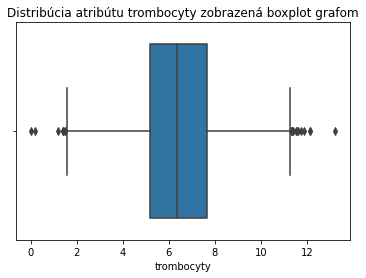

In [34]:
sns.boxplot(data.trombocyty).set_title('Distribúcia atribútu trombocyty zobrazená boxplot grafom')

Tiež si môžme všimnúť väčšie množstvo *outlierov* ako pri predchádzajúcich atribútoch.

### Atribút etytr

In [35]:
data.etytr.describe()

count    9878.000000
mean        6.032210
std         1.502904
min         1.027910
25%         5.047092
50%         5.864550
75%         6.848598
max        12.900650
Name: etytr, dtype: float64

Opäť pracujeme s atribútom typu float, jedná sa o spojitý číselný atribút, a vidíme 30 chýbajúcich záznamov.

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribúcia atribútu etytr zobrazená boxplot grafom')

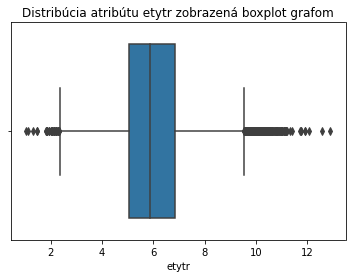

In [36]:
sns.boxplot(data.etytr).set_title('Distribúcia atribútu etytr zobrazená boxplot grafom')

Pri záznamoch atribútu **etytr** vidíme zatiaľ najväččší počet outlierov.

## 2.Párová analýza dát

### Náhľad na vzťahy medzi jednotlivými atribútmi pomocou heatmapy

Heatmapa zobrazuje vzájomné hodnoty korelácie jednotlivých premenných resp. mieru ich vzájomnej závisloti, pričom platí:

* -1 perfektná negatívna korelácia - ak sa zvyšujú hodnoty jednej premennej znižujú sa hodnoty druhej premennej a naopak
* 0 žiadna korelácia - hodnoty premenných sú vzájomne nezávislé
* 1 perfektná kladná korelácia - ak sa zvyšujú hodnoty jednej premennej zvyšujú sa aj hodnoty druhej premennej

Text(0.5, 1.0, 'Heatmapa zobrazuje hodnoty korelácie jednotlivých atribútov')

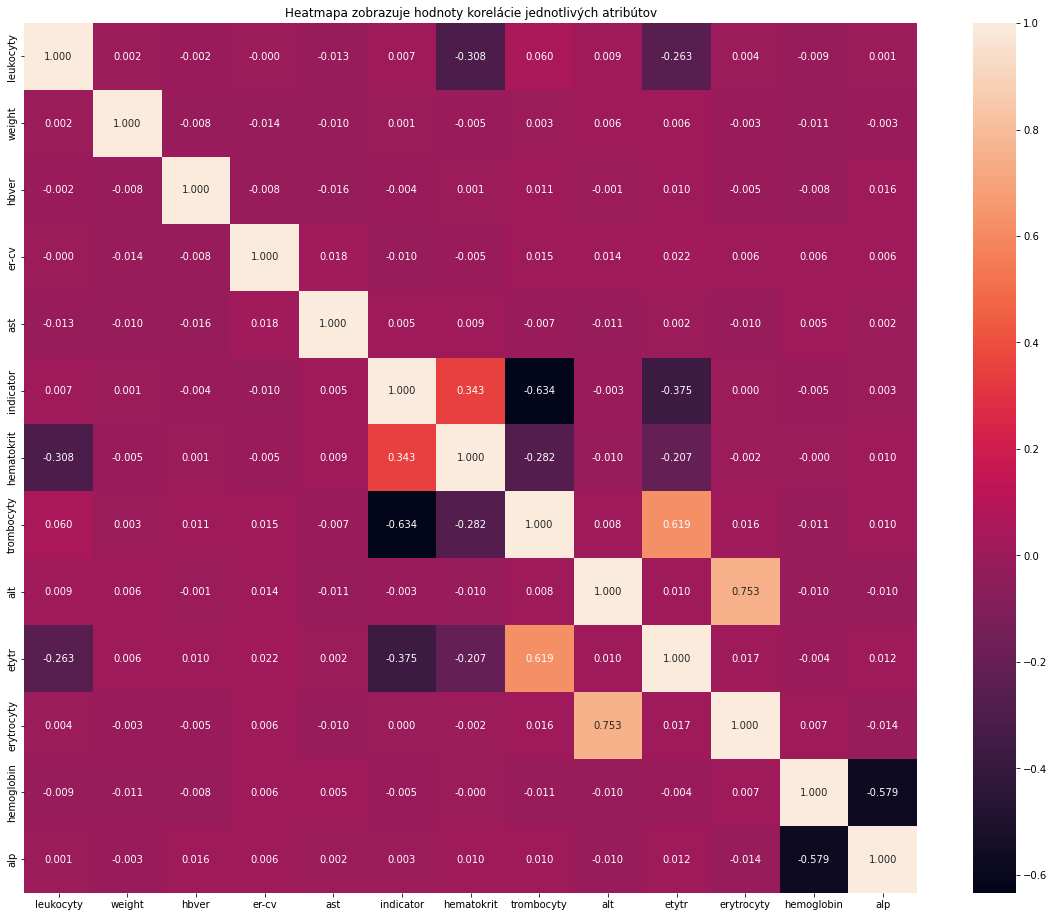

In [37]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(data.dropna().corr(),ax=ax, annot =True, fmt = ".3f").set_title('Heatmapa zobrazuje hodnoty korelácie jednotlivých atribútov')

**Zistenia z heatmapy:**

   1.  relatívne významná pozitívna korelácia medzi atribútom alt(Alanine Aminotransferase) a atribútom erytrocyty
   2.  relatívne významná pozitívna korelácia medzi atribútom trombocyty a atribútom etytr
   3.  relatívne nízka pozitívna korelácia medzi atribútom indicator a atribútom hematokrit
   4.  relatívne významná negatívna korelácia medzi atribútom trombocyty a atribútom indicator
   5.  relatívne významná negatívna korelácia medzi atribútom hemoglobín a atribútom alp(Alkaline phosphatase)
   6.  relatívne nízka negatívna korelácia medzi atribútom leukocyty a atribútom hematokrit
   7.  relatívne nízka negatívna korelácia medzi atribútom indicator a atribútom etytr
   8.  korelácia atribútu weight s ostanými atribútmi je takmer zanedbateľná *
   9.  korelácia atribútu hbver s ostanými atribútmi je takmer zanedbateľná *
   10. korelácia atribútu er-cv s ostanými atribútmi je takmer zanedbateľná *
   11. korelácia atribútu ast s ostanými atribútmi je takmer zanedbateľná *
   
**Celkovo možno na základe údajov z danej heatmapy prehlásiť, že korelácie medzi atribútmy sú relatívne nízke a dokonca sa v datasete spomedzi spojitých atribútov nevyskytujú žiadne dva atribúty ktorých koreláciu by bolo možné označiť za vysokú.**

zdroj klasifikácie korelácie: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm
    
*preto jeho hodnoty pravdepodobne výrazne neovplyvňujú a ani nie sú ovplyvňované hodnotami iných atribútov preto nebude pre naše skúmanie považovaný za významný()

### Z heatmapy vidime, ze nas pri klasifikacii budu zaujimat pri predikovaní atribútu indikátor najviac hodnoty *atribútov, trombocyty, etytr a hematokrit a leukocyty*

**Pairplot významých atribútov určených podľa korelácií z heatmapy vzhľadom na predikovanú premennú indikátor**

Z grafox možno odpozorovať, že hodnota indikátora je závislá najviac ovplyvňovaná hodnotami atribútov etytr, hematokrit a trombocyty, čo vyplýva aj z heatmapy korelácií. **Teda najmä na základe týchto 3 atribútov(trombocyty, etytr, hemtokrit) sa pokúsime predikovať hodnotu indikátora.** Podľa grafu v prípade ostatných atribútov, na základe ich hodnoty nemožno predikovať hodnotu indikátora.

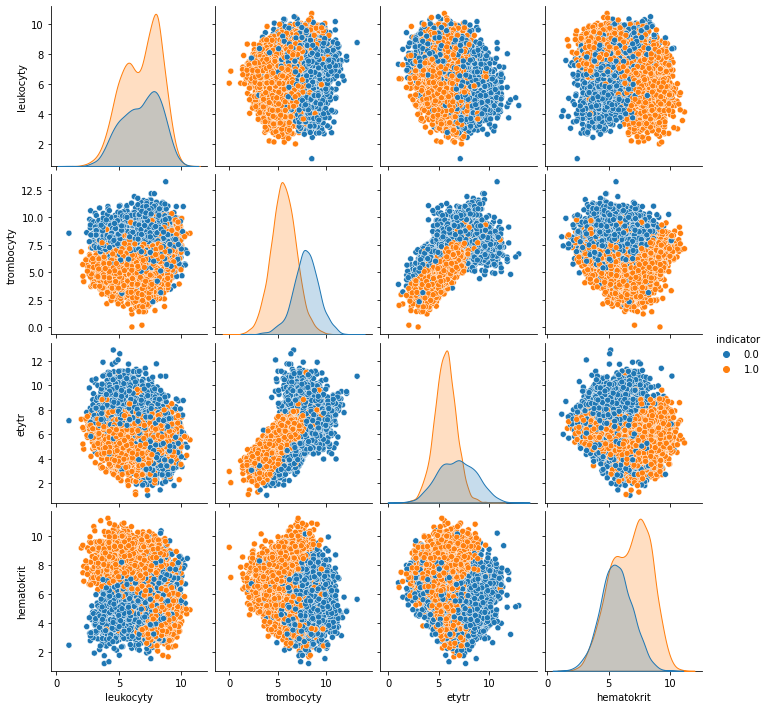

In [38]:
sns.pairplot(data, vars=['leukocyty', 
                          'trombocyty', 
                          'etytr',  
                          'hematokrit'],hue="indicator", diag_kind='kde')

### Vzťah atribútu leukocyty a hematokrit

Pearson korelácia medzi atribútmi leukocyty a hematokrit: -0.308


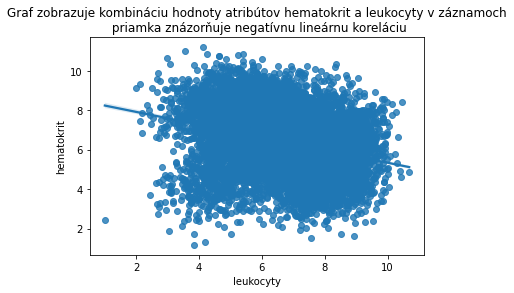

In [39]:
sns.regplot(x="leukocyty", y="hematokrit", data=data).set_title('Graf zobrazuje kombináciu hodnoty atribútov hematokrit a leukocyty v záznamoch\n priamka znázorňuje negatívnu lineárnu koreláciu')
print("Pearson korelácia medzi atribútmi leukocyty a hematokrit: %.3f" % data.leukocyty.corr(data.hematokrit))

Rovnako aj graf aj pearson korelácia potvrdzujú zistenia z heatmapy a to, že medzi atribútmi leukocyty a hematokrit je negatívna lineárna korelácia s hodnotou -0.308. Teda tieto dva atribúty sú vo vzájomnom vzťahu avšak tento vzťah je relatívne nízky, keďže v grafe nie sú ani žiadne lokálne zhluky ale variability medzi hodnotami jedného atribútu vzhľadom na druhý je relatívne vysoká.

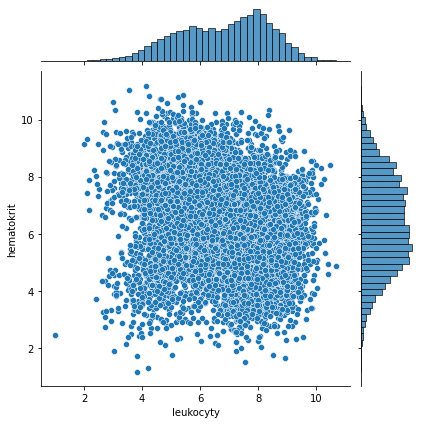

In [40]:
sns.jointplot(x=data['leukocyty'], y=data['hematokrit'])

Z grafu možno vidieť, že oba atribúty majú podobnú distribúciu, avšak vo všeobecnosti sa vykytujú rôzne kombinácie týchto hodnôt(teda na základe hodnoty 1 premennej nevieme s vysokou mierou presnosti predpovedať hodnotu druhej premennej) čo sme aj predpokladali podľa nízkej hondoty ich korelácie.

### Vzťah atribútu weight a indicator

Nasjkôr si vytvoríme hmotnostné kategórie po desitich kilogramoch, aby sme vedeli spojitý atribút weight lepšie vyhodniť - zaradiť do skupín.

weight group,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,100-110,110-120,120-130,130-140,140-150,150-160,160-170,170-180,180-190,190-200
indicator,,,,,,,,,,,,,,,,,,,,
0.0,66,123,173,238,315,399,415,381,365,310,213,167,102,80,52,23,7,7,4,0
1.0,127,205,298,439,555,688,753,707,637,560,443,331,228,124,80,36,21,5,1,1


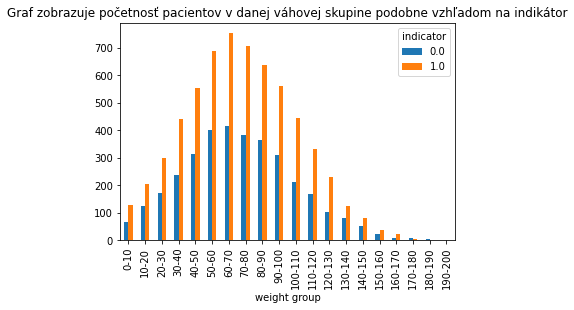

In [41]:
categ = pd.cut(data.weight,bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160','160-170','170-180','180-190','190-200'])
tmp = data
tmp.insert(3,'weight group',categ)
tab2 = pd.crosstab(index=tmp["indicator"],columns=tmp["weight group"])
pd.crosstab(index=data["weight group"], columns=data["indicator"]).plot.bar().set_title('Graf zobrazuje početnosť pacientov v danej váhovej skupine podobne vzhľadom na indikátor')
tab2

Tabuľka zobrazuje početnosť jednotlivých záznamov zaradených do kategórií podľa do hodnoty weight vzhľadom na indikátor.

Z grafu aj tabuľky možno vidieť takmer žiadnu koreláciu atribútu weight a inidicator. Keďže pomer záznamov s indikátorom 0 aj 1 je v každej skupine približne rovnaký.

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu indicator pre rôzne hodnoty weight')

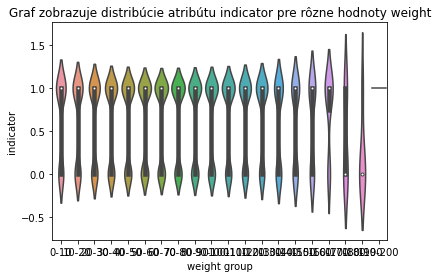

In [42]:
sns.violinplot(x="weight group", y="indicator", data=tmp).set_title('Graf zobrazuje distribúcie atribútu indicator pre rôzne hodnoty weight')

Violinplot, zobrazujúci distribúcie indikátora pre nami vytvorené váhové kategórie tiež potvrdzuje, že distribúcia atribútu indikátor je takmer rovnaká vo všetkých váhoých kategóriach, preto prvadepodobne atribút indikátor nezávisí od atribútu weight.

### Vzťah atribútu indicator a trombocyty

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu trombocyty vzhľadom na indikátor')

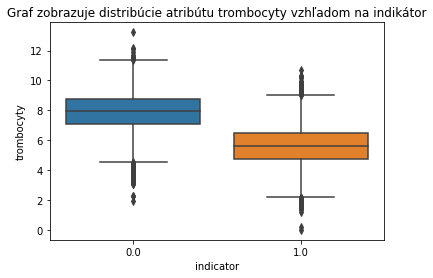

In [43]:
sns.boxplot(x='indicator', y='trombocyty', data=data).set_title('Graf zobrazuje distribúcie atribútu trombocyty vzhľadom na indikátor')

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu trombocyty vzhľadom na indikátor')

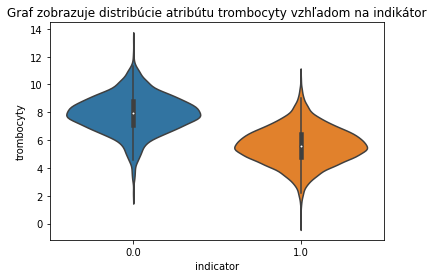

In [44]:
sns.violinplot(x='indicator', y='trombocyty', data=data).set_title('Graf zobrazuje distribúcie atribútu trombocyty vzhľadom na indikátor')

Z grafov zobrazujúcich distribúciu trombocytov vzhľadom na indikátor vidieť, že pacienti, ktorý majú hodnotu indikátora 1 dosahujú v priemere nižšie hodnoty atribútu trombocyty. Pričom z grafu je jasné, že distribúcia premennej trombocyty aj vzhľadom na extrémne hodnoty je v oboch prípadoch približne rovnaká rovnako aj samotné outlier hodnoty sú priemerne nižšie pri indikátore 1. Preto možno predpokladať(aj vzhľadom na negatívnu koreláciu týchto dvoch premenných), že pacienti s indikátorom majú v priemere menej trombocytov ako pacienti bez indikátora. **Predpoklad je, že ak má pacient menej trombocytov ako 4 pravdepodobne bude mať indikátor 1 a rovnako ak má viac trombocytov ako 9 pravdepodobne bude jeho indikátor 0**  

Z grafu možno taktiež vidieť, že pacienti s indikátorom majú v priemere výššiu hodnotu trombocytov a etytr ako tí s indikátorom 0

### Vzťah atribútu indicator a hematokrit

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu hematokrit vzhľadom na indikátor')

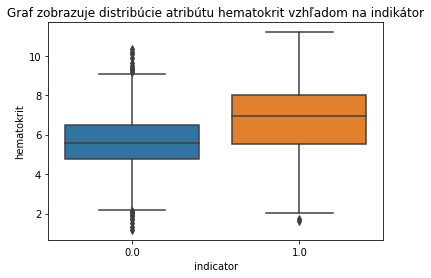

In [45]:
sns.boxplot(x='indicator', y='hematokrit', data=data).set_title('Graf zobrazuje distribúcie atribútu hematokrit vzhľadom na indikátor')

Z grafu vidieť, že pacienti, ktorý majú hodnotu indikátora 1 dosahujú v priemere vyššie hodnoty atribútu hematokrit. Avšak medzi kvartilové rozpetie hodnôt tohto atribútu je väčšie, teda väčšina hodnôt je blízko hodnoty mediánu zatiaľ čo u pacientov s hodnotu atribútu indikátor 0 je u pacientov hodnota hematokritu viac rozptýlená pravdepodobne aj kvôli početnej prítomnosti extrémnych hodnôt alebo outlierov. **Preto možno predpokladať, že ak má pacient extrémne málo hematokritov(menej ako 2) je pravdepodobnejšie, že bude mať indikátor 0 rovnako ak bude mať vela hematokritov(viac ako 9).**

Nasjkôr si vytvoríme kategórie po dvoch jednotkách atribútu hematokrit, aby sme vedeli spojitý atribút hematorkti lepšie vyhodniť - zaradiť do skupín.

In [46]:
categ = pd.cut(data.hematokrit,bins=[1,2,3,4,5,6,7,8,9,10,11,12],labels=['1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12'])
tmp = data
tmp.insert(3,'HK group',categ)
tab2 = pd.crosstab(index=tmp["indicator"],columns=tmp["HK group"])
tab2

HK group,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12
indicator,,,,,,,,,,,
0.0,7,68,275,775,1044,816,405,100,9,3,0
1.0,2,35,259,674,1131,1189,1474,1168,402,40,2


Tabuľka zobrazuje početnosť jednotlivých záznamov zaradených do kategórií podľa do hodnoty hematokrit vzhľadom na indikátor.

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated func

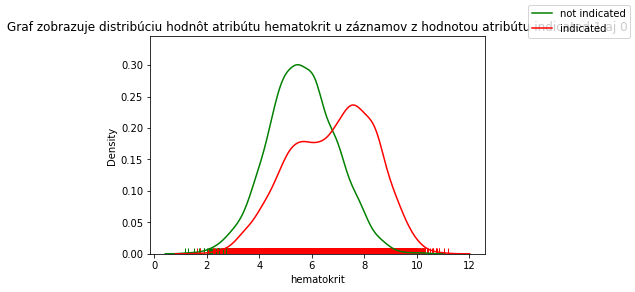

In [47]:
f, (ax1) = plt.subplots(1, sharex=True)
sns.distplot(data[data['indicator']  == 0].hematokrit, hist=False, color='green',rug=True, label="not indicated")
sns.distplot(data[data['indicator']  == 1].hematokrit, hist=False, color='red',rug=True, label="indicated").set_title('Graf zobrazuje distribúciu hodnôt atribútu hematokrit u záznamov z hodnotou atribútu indicated 1 aj 0')
f.legend()

Z grafu distribúcií atribúty hematokrit možno pozorovať, že distribúcia hodnôt atribútu hematokrit je mierna odlišná podľa hodnoty atribútu indicator. Preto možno predpokladať, že je pravdepodobne štatisticky významný rozdiel v hodnote hematokritu medzi pacientami ktorý majú indikátor 0 a tými ktorý ho majú 1. Toto by sa dalo overiť štatistickým testom.

### Vzťah atribútu smoker a indicator

smoker,N,Y,no,yes
indicated,172,729,1923,690
not indicated,321,1223,3521,1329


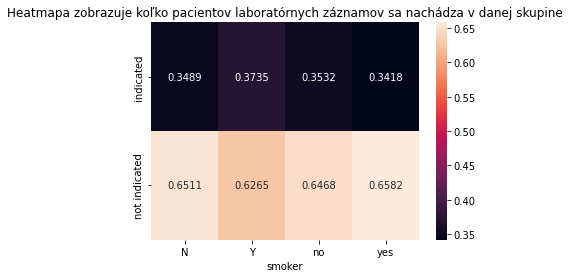

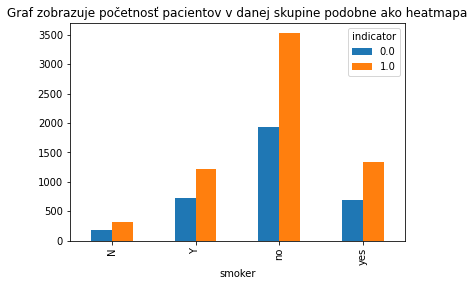

In [48]:
tab2 = pd.crosstab(index=data["indicator"],columns=data["smoker"])
tab2.index= ["indicated","not indicated"]

tab2perc =  pd.crosstab(index=data["indicator"], columns=data["smoker"], normalize='columns') 
tab2perc.index= ["indicated","not indicated"]
sns.heatmap(tab2perc, annot=True,fmt=".4f").set_title('Heatmapa zobrazuje koľko pacientov laboratórnych záznamov sa nachádza v danej skupine')
pd.crosstab(index=data["smoker"], columns=data["indicator"]).plot.bar().set_title('Graf zobrazuje početnosť pacientov v danej skupine podobne ako heatmapa')
tab2.style.set_caption("Tabuľka zobrazuje početnosť pacientov pre hodnoty indikátora 0(notindicated) a 1(indicated) v závisloti od toho či sú fajčiary")

Z grafu vyplýva, že obe skupiny indicated aj not indicated sú zastúpené približne rovnako v každom type smoker **preto možno predpoklať, že atribút smoker nemá vplyv na predikovaný atribút indikátor.**

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu indicator pre rôzne hodnoty smoker')

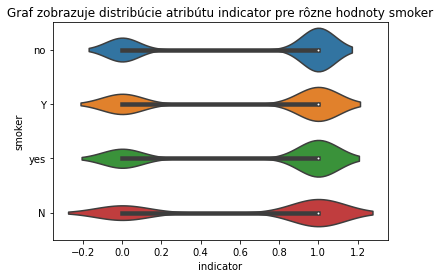

In [49]:
sns.violinplot(x='indicator', y='smoker', data=data).set_title('Graf zobrazuje distribúcie atribútu indicator pre rôzne hodnoty smoker')

Grafy distribúcie potvrdzujú, že distribúcia hodnôt premennej indikátor takmer rovnaká v každej kategórií smoker preto pravdepodobne nemá atribút smoker vplyv na indicator.

### Vzťah atribútu relationship a indicator

In [50]:
relationship = pd.crosstab(index=data.indicator, columns=data["relationship"])
relationship.index=["no indicator", "indicator"]
relationship.style.set_caption("Tabuľka zobrazuje početnosť pacientov pre hodnoty indikátora 0(notindicated) a 1(indicated) v závisloti od ich partnerského vzťahu")

relationship,divoced,married,nop,separated,single,widowed
no indicator,850,928,318,356,707,355
indicator,1532,1643,642,653,1282,642


Z tabuľky vyplýva, že vzťahový stav pacienta nemá vplyv na indikátor pretože v každej skupine je zhruba rovnako pravdepodobné, že bude mať indikátor rovný 1.

Text(0.5, 1.0, 'Graf zobrazuje početnosť pacientov v danej skupine podobne ako heatmapa')

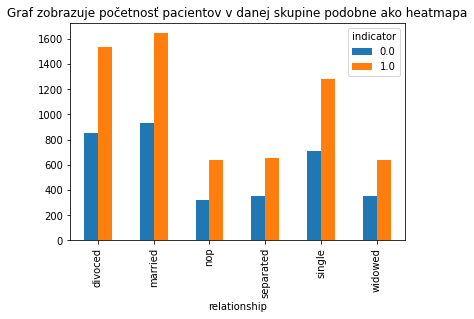

In [51]:
pd.crosstab(index=data["relationship"], columns=data["indicator"]).plot.bar().set_title('Graf zobrazuje početnosť pacientov v danej skupine podobne ako heatmapa')

Z grafu vyplýva, že obe skupiny indicated aj not indicated sú zastúpené približne rovnako v každom type relationship preto možno predpokladať, že atribút relationship nemá vplyv na hodnotu indikátora.

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu indicator pre rôzne hodnoty relationship')

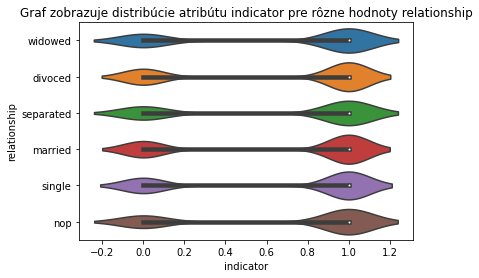

In [52]:
 sns.violinplot(x="indicator", y="relationship", data=data).set_title('Graf zobrazuje distribúcie atribútu indicator pre rôzne hodnoty relationship')

Grafy distribúcie potvrdzujú, že distribúcia hodnôt premennej indikátor takmer rovnaká v každej kategórií relationship preto pravdepodobne nemá atribút relationship vplyv na indicator.

## 3. Formulácia a štatistické overenie hypotéz o dátach

### Hypotéza č.1: 
#### Ho: Ak má pacient menej trombocytov ako 5 pravdepodobne bude potrebovať ďalšie vyšetrenie a teda hodnota jeho indikátora je 1.
#### H1: Ak má pacient menej trombocytov ako 5, môže byť hodnota jeho indikátora rovnako aj 1 aj 0.

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graf zobrazuje kombináciu hodnoty atribútov trombocyty a etytr v záznamoch')

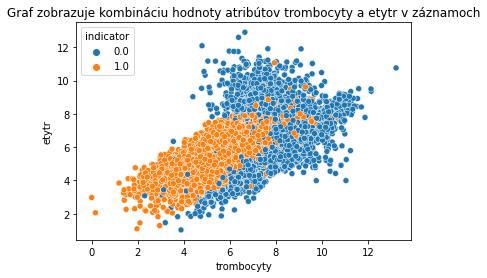

In [53]:
sns.scatterplot(data['trombocyty'], data['etytr'], hue=data['indicator']).set_title('Graf zobrazuje kombináciu hodnoty atribútov trombocyty a etytr v záznamoch')

V grafe možno vidieť, že hodnota indicatora 1 sa koncentruje prevažne u nízkych hodnotách atribútu trombocyty.

### Overenie hypotézy č.1:

Text(0.5, 1.0, 'Graf zobrazuje distribúcie atribútu trombocyty vzhľadom na indikátor')

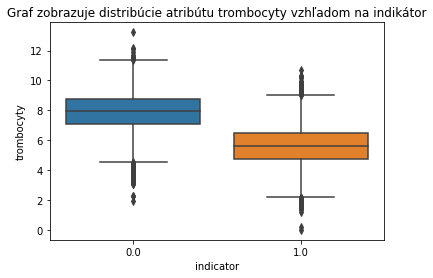

In [54]:
sns.boxplot(x='indicator', y='trombocyty', data=data).set_title('Graf zobrazuje distribúcie atribútu trombocyty vzhľadom na indikátor')

Z grafu možno pozorovať rozdiel v distribúcií hodnôt trombocytov vzhľadom na indikátor. Mean skupiny s indikátorom 1 je nižšíí preto pravdepodobne nižšia hodnota trombocytov sa skutočne vyskytuje pri indikátore rovnému 1. Dáta obsahuj pomerne veľké množstvo outlierov. Z deskriptívnych štatistík možno identifikovať, že distribúcia trombocytov pre obe skupiny indikátora je takmer rovnaká avšak celková početnosť záznamov je takmer 20 násobná u skupiny pacientov s indikátorom 1. Preto je pravdepodobné, že na základe nízkej hodnoty trombocytov je možné predpokladať hodnotu indicator 1.

**Rozdelíme pacientov do dvoch skupín podľa hodnoty indikátora a následne budeme štatisticky skúmať hodnotu trombocytov pre tieto 2 skupiny**. Teda sa pozriem na základné deskriptívne štatisktiky tohto atribútu a jeho rozdelenie u oboch skupín pacientov.

In [55]:
test_data = data[(data.trombocyty < 5)]

In [56]:
indicated = test_data[test_data['indicator']  == 1].trombocyty
indicated= indicated.dropna()
indicated.describe()

count    2027.000000
mean        4.161161
std         0.706285
min         0.000000
25%         3.781715
50%         4.334560
75%         4.716655
max         4.997450
Name: trombocyty, dtype: float64

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graf zobrazuje distribúciu hodnôt atribútu trombocyty pre záznamy s hodnotou indikátora 1')

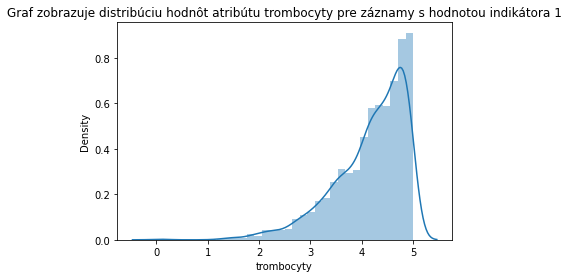

In [57]:
sns.distplot(indicated).set_title('Graf zobrazuje distribúciu hodnôt atribútu trombocyty pre záznamy s hodnotou indikátora 1')

In [58]:
notindicated = test_data[test_data['indicator']  == 0].trombocyty
notindicated= notindicated.dropna()
notindicated.describe()

count    92.000000
mean      4.265925
std       0.664429
min       1.967600
25%       3.845302
50%       4.523835
75%       4.764318
max       4.995200
Name: trombocyty, dtype: float64

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graf zobrazuje distribúciu hodnôt atribútu trombocyty pre záznamy s hodnotou indikátora 0')

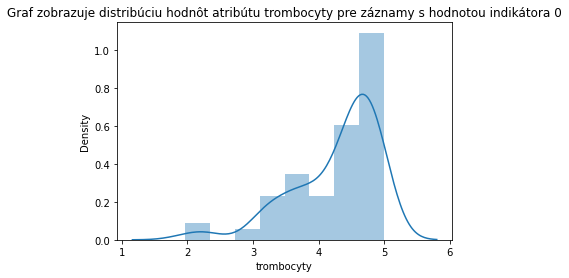

In [59]:
sns.distplot(notindicated).set_title('Graf zobrazuje distribúciu hodnôt atribútu trombocyty pre záznamy s hodnotou indikátora 0')

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated func

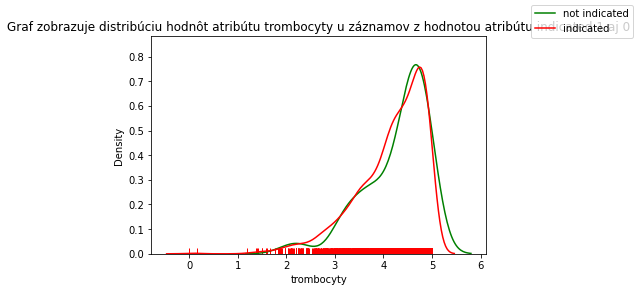

In [60]:
f, (ax1) = plt.subplots(1, sharex=True)
sns.distplot(notindicated, hist=False, color='green',rug=True, label="not indicated")
sns.distplot(indicated, hist=False, color='red',rug=True, label="indicated").set_title('Graf zobrazuje distribúciu hodnôt atribútu trombocyty u záznamov z hodnotou atribútu indicated 1 aj 0')
f.legend()

z grafov nemožno síce pozorovať, že pre hodnotu trombocytov menšiu ako 5 dosahuje prevažné množstvo pacientov hodnotu indikátora 1 avšak z pohľadu na deskriptívnu štatistiku dát vyplýva, že prevažné množstvo pacientov, ktorý majú nižšiu hodnotu trombocytov má indikátor rovný 1. 

**Vzhľadom na boxplot obsahujú dáta o trombocytoch relatívne veľké množstvo outlier hodnôt preto sa ich rozhodneme odstrániť a preskúmať ako to ovplyvní skúmané dáta.**

In [61]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

Funkcia voľne prevzatá z: https://github.com/FIIT-IAU/2021-2022/tree/main/cvicenia

In [62]:
df_out = identify_outliers(indicated)
indicated = indicated.drop(df_out.index)

In [63]:
indicated.describe()

count    1976.000000
mean        4.219250
std         0.609835
min         2.410260
25%         3.844610
50%         4.353325
75%         4.722275
max         4.997450
Name: trombocyty, dtype: float64

**Po odstránení možno skutočne pozorovať miernu zmenu v distribúcií trombocytov**

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graf zobrazuje distribúciu hodnôt atribútu trombocyty po odstránení outlierov pre záznamy s hodnotou indikátora 1')

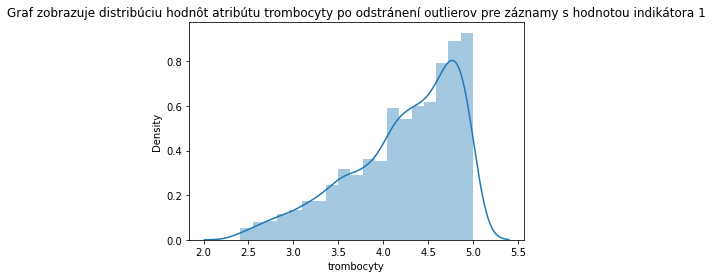

In [64]:
sns.distplot(indicated).set_title('Graf zobrazuje distribúciu hodnôt atribútu trombocyty po odstránení outlierov pre záznamy s hodnotou indikátora 1')

In [65]:
df_out = identify_outliers(notindicated)
notindicated = notindicated.drop(df_out.index)

In [66]:
notindicated.describe()

count    89.000000
mean      4.336421
std       0.549218
min       3.066140
25%       3.879970
50%       4.540070
75%       4.774570
max       4.995200
Name: trombocyty, dtype: float64

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graf zobrazuje distribúciu hodnôt atribútu trombocyty po odstránení outlierov pre záznamy s hodnotou indikátora 0')

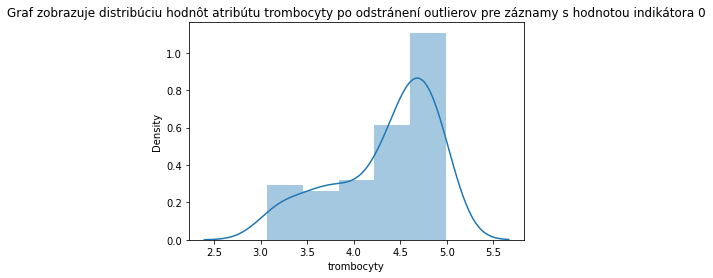

In [67]:
sns.distplot(notindicated).set_title('Graf zobrazuje distribúciu hodnôt atribútu trombocyty po odstránení outlierov pre záznamy s hodnotou indikátora 0')

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated func

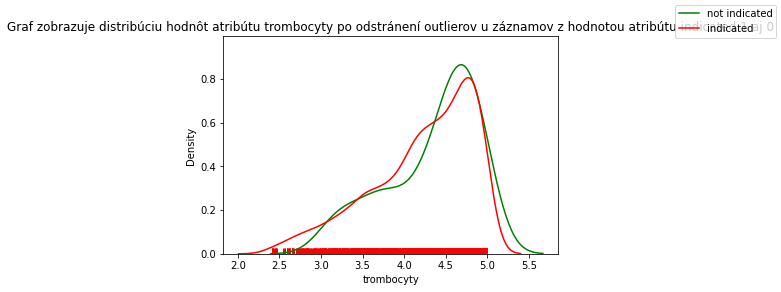

In [68]:
f, (ax1) = plt.subplots(1, sharex=True)
sns.distplot(notindicated, hist=False, color='green',rug=True, label="not indicated")
sns.distplot(indicated, hist=False, color='red',rug=True, label="indicated").set_title('Graf zobrazuje distribúciu hodnôt atribútu trombocyty po odstránení outlierov u záznamov z hodnotou atribútu indicated 1 aj 0')
f.legend()

z grafov nemožno síce pozorovať, že pre hodnotu trombocytov menšiu ako 5 dosahuje prevažné množstvo pacientov hodnotu indikátora 1 avšak z pohľadu na deskriptívnu štatistiku dát vyplýva, že prevažné množstvo pacientov, ktorý majú nižšiu hodnotu trombocytov má indikátor rovný 1. 

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


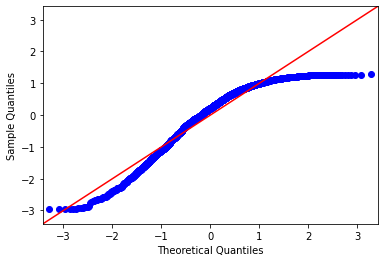

In [69]:
_ = sm.ProbPlot(indicated, fit=True).qqplot(line='45')

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


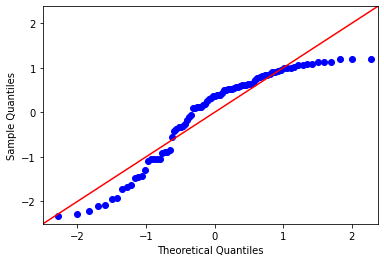

In [70]:
_ = sm.ProbPlot(notindicated, fit=True).qqplot(line='45')

Podľa QQ plotu vieme, že obe dátové sady sú z Light tailed rozdelenia. Predtým ako môžme zvoliť štatistický test musíme určiť, či dáta pochádzajú z rovnakého rozdelenia.

In [71]:
stats.shapiro(indicated)

ShapiroResult(statistic=0.9222555160522461, pvalue=8.807388602349547e-31)

Hodnota pvalue je menšia ako 0,05 preto dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia

In [72]:
stats.shapiro(notindicated)

ShapiroResult(statistic=0.8893978595733643, pvalue=1.5686201777498354e-06)

Hodnota pvalue je menšia ako 0,05 preto dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia

T-test kvôli tomu, že rozdelenie dát v druhej vzorke pravdepodobne nie je normálne nemôžme použiť ako štatistický test T-test. Preto použijeme Mann-Whiteneyho U-test.

In [73]:
stats.mannwhitneyu(indicated, notindicated)

MannwhitneyuResult(statistic=78379.0, pvalue=0.0825607817496879)

### Keďže pvalue je väčšia ako 0,001 H0 nezamietame a teda predpokladáme, že H0 platí *Ak má pacient menej trombocytov ako 5 pravdepodobne bude potrebovať ďalšie vyšetrenie a teda hodnota jeho indikátora je 1.*

In [74]:
sms.DescrStatsW(indicated).tconfint_mean()

(4.19234499558542, 4.246155024657498)

In [75]:
sms.DescrStatsW(notindicated).tconfint_mean()

(4.220726859586687, 4.4521149381661225)

Text(0.5, 1.0, 'Početnosť záznamov pre hodnoty trombocytov menej ako 5 delená podľa indikátora')

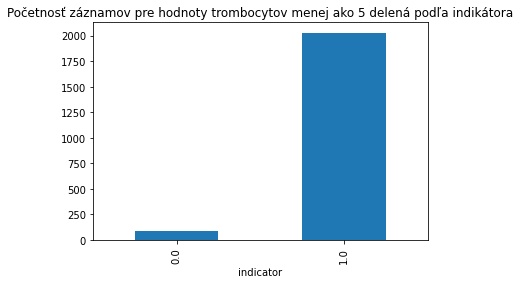

In [76]:
test_data.groupby(['indicator']).size().plot(kind = "bar").set_title('Početnosť záznamov pre hodnoty trombocytov menej ako 5 delená podľa indikátora')

Z grafu početnosti pacientov v jednotlivých skupinách podľa indikátora, skutočne vidíme, že drivá väčšina záznamov, ktorá má menej trombocytov ako 5 má hodnotu indikátora 1.

### Hypotéza č.2: 
#### H0: Hodnota etytr pacientov ktorý budú potrebovať vyšetrenie a tých ktorý nie je v podstate rovnaká
#### H1: Rozdiel v hodnote etytr pacientov, ktorý budú potrebovať vyšetrenie a tých ktorý nie je štatisticky významný.

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graf zobrazuje kombináciu hodnoty atribútov trombocyty a etytr v záznamoch')

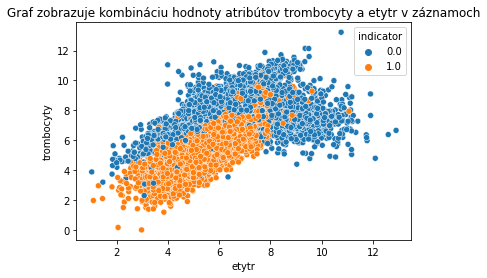

In [77]:
sns.scatterplot(data['etytr'], data['trombocyty'], hue=data['indicator']).set_title('Graf zobrazuje kombináciu hodnoty atribútov trombocyty a etytr v záznamoch')

V grafe možno vidieť, že hodnota indicatora 1 sa koncentruje prevažne u nízkych hodnotách atribútu etytr.

### Overenie hypotézy č.2:

Text(0.5, 1.0, 'Graf zobrazuje distribúciu hodnôt atribútu etytr po odstránení outlierov pre záznamy s hodnotou indikátora 1')

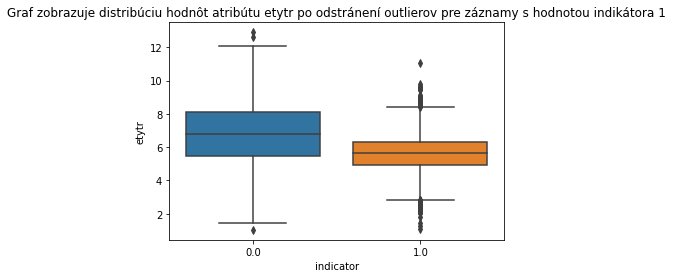

In [78]:
sns.boxplot(x='indicator', y='etytr', data=data).set_title('Graf zobrazuje distribúciu hodnôt atribútu etytr po odstránení outlierov pre záznamy s hodnotou indikátora 1')

Z grafu možno pozorovať, že záznamy s indikátorom 1 dosahuje hodnotu etytr väčšiu ako 9 a menšiu ako 3 len u zopár outlier hodnôt narozdiel od skupiny s indikátorom 0 kde etytr dosahuje hodnoty od 2 po 12 sú v rámci kvartilov. Preto možno predpokladať, že bude existovať nejaký rozdiel medzi hodnotami etytr u pacientov, čo majú hodnotu idicator 0 a tými, čo majú hodnotu indicator 1. Rovnako aj deskriptívne štatistiky popisujú výrazný posun v hodnote 1 a 3 kvartilu.

**Rozdelíme pacientov do dvoch skupín podľa hodnoty indikátora a následne budeme štatisticky skúmať hodnotu hematokrit pre tieto 2 skupiny**

In [79]:
indicated = data[data['indicator']== 1].etytr
indicated= indicated.dropna()
indicated.describe()

count    6375.000000
mean        5.614325
std         1.076087
min         1.092300
25%         4.927125
50%         5.629680
75%         6.319570
max        11.061880
Name: etytr, dtype: float64

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graf zobrazuje distribúciu hodnôt atribútu etytr pre záznamy s hodnotou indikátora 1')

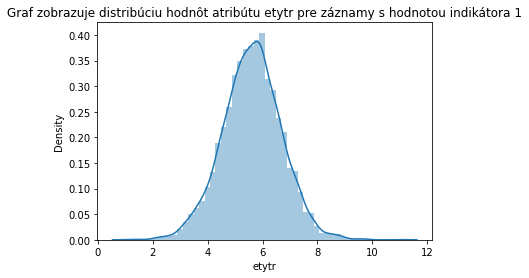

In [80]:
sns.distplot(indicated).set_title('Graf zobrazuje distribúciu hodnôt atribútu etytr pre záznamy s hodnotou indikátora 1')

In [81]:
notindicated = data[data['indicator']== 0].etytr
notindicated= notindicated.dropna()
notindicated.describe()

count    3503.000000
mean        6.792706
std         1.834786
min         1.027910
25%         5.438890
50%         6.801550
75%         8.133475
max        12.900650
Name: etytr, dtype: float64

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graf zobrazuje distribúciu hodnôt atribútu etytr pre záznamy s hodnotou indikátora 0')

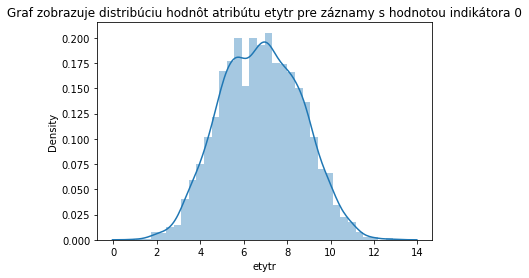

In [82]:
sns.distplot(notindicated).set_title('Graf zobrazuje distribúciu hodnôt atribútu etytr pre záznamy s hodnotou indikátora 0')

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated func

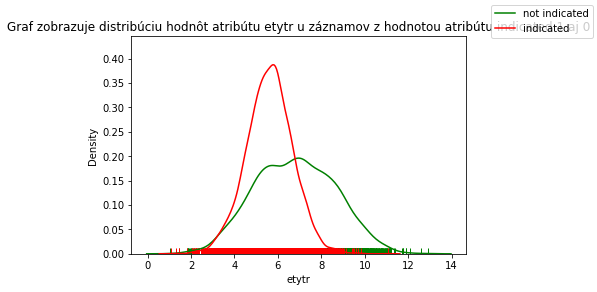

In [83]:
f, (ax1) = plt.subplots(1, sharex=True)
sns.distplot(notindicated, hist=False, color='green',rug=True, label="not indicated")
sns.distplot(indicated, hist=False, color='red',rug=True, label="indicated").set_title('Graf zobrazuje distribúciu hodnôt atribútu etytr u záznamov z hodnotou atribútu indicated 1 aj 0')
f.legend()

Na základe rozdielnej distribúcie hodnôt etytr je možné predpoklať, že pravdepodobne nejaký rozdiel medzi hodnotami etytr je otázne je, či je signifikantný anlyzujme preto dáta ďalej.

**Vzhľadom na boxplot obsahujú dáta o etytr relatívne veľké množstvo outlier hodnôt preto sa ich rozhodneme odstrániť a preskúmať ako to ovplyvní skúmané dáta.**

In [84]:
df_out = identify_outliers(indicated)
indicated = indicated.drop(df_out.index)

In [85]:
indicated.describe()

count    6288.000000
mean        5.611414
std         1.011834
min         2.850310
25%         4.936325
50%         5.628340
75%         6.307052
max         8.407200
Name: etytr, dtype: float64

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graf zobrazuje distribúciu hodnôt atribútu etytr po odstránení outlierov pre záznamy s hodnotou indikátora 1')

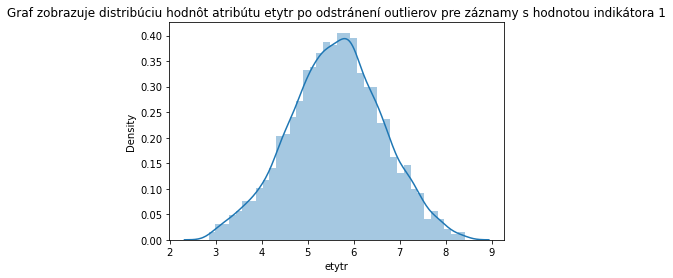

In [86]:
sns.distplot(indicated).set_title('Graf zobrazuje distribúciu hodnôt atribútu etytr po odstránení outlierov pre záznamy s hodnotou indikátora 1')

**Po odstránení outlier hodnôt vidíme, že pacienti čo mali menej trombocytov ako 5 mali indikátor 1.**

In [87]:
df_out = identify_outliers(notindicated)
notindicated = notindicated.drop(df_out.index)

In [88]:
notindicated.describe()

count    3500.000000
mean        6.790950
std         1.827441
min         1.463330
25%         5.439315
50%         6.801440
75%         8.126048
max        12.089790
Name: etytr, dtype: float64

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graf zobrazuje distribúciu hodnôt atribútu etytr po odstránení outlierov pre záznamy s hodnotou indikátora 0')

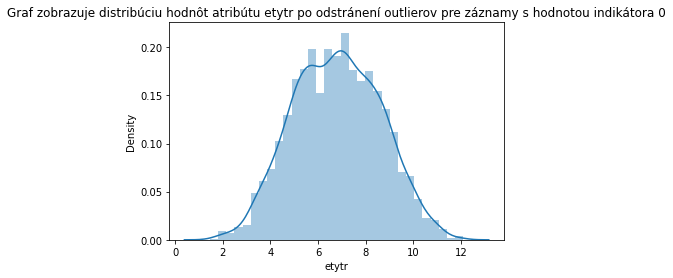

In [89]:
sns.distplot(notindicated).set_title('Graf zobrazuje distribúciu hodnôt atribútu etytr po odstránení outlierov pre záznamy s hodnotou indikátora 0')

**Po odstránení možno skutočne pozorovať miernu zmenu v distribúcií etytr**

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated func

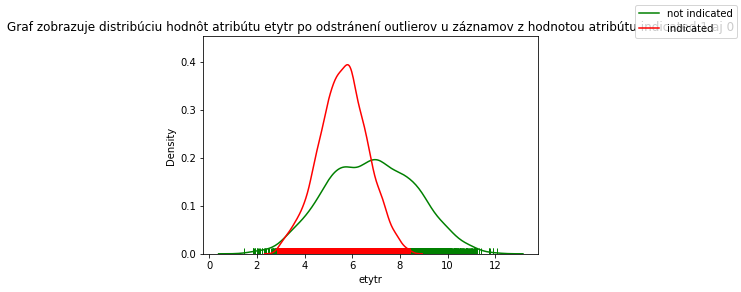

In [90]:
f, (ax1) = plt.subplots(1, sharex=True)
sns.distplot(notindicated, hist=False, color='green',rug=True, label="not indicated")
sns.distplot(indicated, hist=False, color='red',rug=True, label="indicated").set_title('Graf zobrazuje distribúciu hodnôt atribútu etytr po odstránení outlierov u záznamov z hodnotou atribútu indicated 1 aj 0')
f.legend()

Na základe rozdielnej distribúcie hodnôt etytr je možné predpoklať, že pravdepodobne nejaký rozdiel medzi hodnotami etytr je otázne je, či je signifikantný anlyzujme preto dáta ďalej.

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


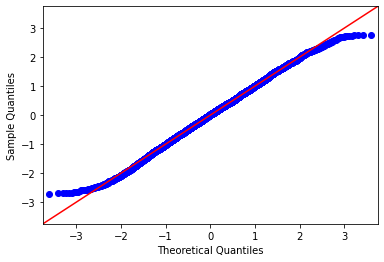

In [91]:
_ = sm.ProbPlot(indicated, fit=True).qqplot(line='45')

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


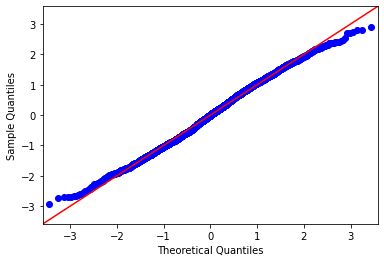

In [92]:
_ = sm.ProbPlot(notindicated, fit=True).qqplot(line='45')

Podľa QQ plotu vieme, že obe dátové sady sú z Light tailed rozdelenia. Predtým ako môžme zvoliť štatistický test musíme určiť, či dáta pochádzajú z rovnakého rozdelenia.

In [93]:
stats.shapiro(indicated)

C:\Users\gregu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9980985522270203, pvalue=5.618961722575477e-07)

Hodnota pvalue je menšia ako 0,05 preto dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia

In [94]:
stats.shapiro(notindicated)

ShapiroResult(statistic=0.9960124492645264, pvalue=4.5254896718915916e-08)

Hodnota pvalue je menšia ako 0,05 preto dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia

T-test kvôli tomu, že rozdelenie dát v druhej vzorke pravdepodobne nie je normálne nemôžme použiť ako štatistický test T-test. Preto použijeme Mann-Whiteneyho U-test.

In [95]:
stats.mannwhitneyu(indicated, notindicated)

MannwhitneyuResult(statistic=6533170.5, pvalue=4.107672297335302e-244)

### Keďže pvalue je menšia ako 0,001 tak pravdepodobnosť chyby 1. rádu je menej ako 1 promile.  H0 zamietame a teda predpokladáme, že platí H1 *Rozdiel v hodnote etytr pacientov, ktorý budú potrebovať vyšetrenie a tých ktorý nie je štatisticky významný.*

In [96]:
sms.DescrStatsW(indicated).tconfint_mean()

(5.5864002956439265, 5.636428470259377)

In [97]:
sms.DescrStatsW(notindicated).tconfint_mean()

(6.73038717367822, 6.851513232036068)

**Vidíme, že pacienti, čo budú potrebovať vyšetrenie majú v priemere o viac ako jednotku vyššiu hodnotu etytr.**

Text(0.5, 1.0, 'lalala')

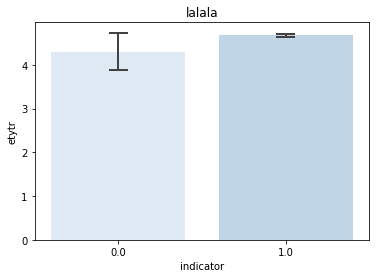

In [98]:
sns.barplot(x='indicator', y='etytr', data=test_data, 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues")).set_title('lalala')

## 4. Identifikácia problémov v dátach s navrhnutým riešením 

###  Rôzne typy odpovedí

Ako už bolo spomenuté v bode 1, problémom záznamov **smoker** je používanie rôznych označení odpovedí (yes/no, Y/N). Problém sa dá vyriešiť prekonvertovaním na jednu formu odpovedí.

In [99]:
data['smoker'].value_counts()

no     5444
yes    2019
Y      1952
N       493
Name: smoker, dtype: int64

In [100]:
data['smoker'] = data['smoker'].str.replace('Y','yes')
data['smoker'] = data['smoker'].str.replace('N','no')
data['smoker'].value_counts()

no     5937
yes    3971
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Graf zobrazujúci pomer medzi fajčiarmi a nefajčiarmi')

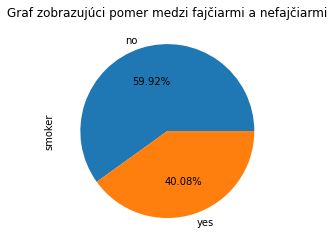

In [101]:
data.smoker.value_counts().plot.pie( autopct='%1.2f%%').set_title('Graf zobrazujúci pomer medzi fajčiarmi a nefajčiarmi')

###  Nesprávne hodnoty

In [102]:
data.weight.describe()

count    9908.000000
mean       70.005749
std        34.909530
min       -72.655610
25%        47.074018
50%        69.480125
75%        93.613275
max       192.049500
Name: weight, dtype: float64

Záznamy atribútu **weight** obsahujú záporné hodnoty ktoré samozrejme nemôžu byť pravdivé a preto máme na výber 2 riešenia:
- Odstránenie záporných hodnôt
- Otočenie znamienka záporných hodnôt

Budeme predpokladať že záporné hodnoty sa do záznamov dostali nezámerným pripísaním znamienka mínus a preto zvolíme druhé riešenie - otočenie znamienka pomocou funkcie *abs()*

In [103]:
data.weight = abs(data.weight)

Text(0.5, 1.0, 'Distribúcia váhy pacientov zobrazená histogramom (Po upravení hodnôt)')

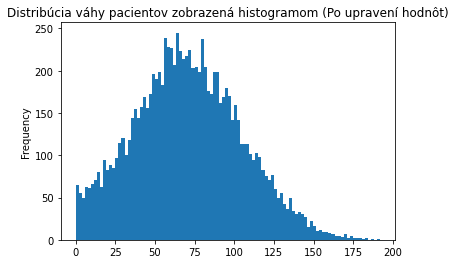

In [104]:
data.weight.plot(kind='hist', bins=100).set_title('Distribúcia váhy pacientov zobrazená histogramom (Po upravení hodnôt)')

### Preklep v záznamoch atribútu

Tento problém nieje závažný ale je ľahko vyriešiteľný :

In [105]:
data['relationship'] = data['relationship'].str.replace('divoced','divorced')

In [106]:
data.relationship.unique()

array(['widowed', 'divorced', 'separated', 'married', 'single', 'nop'],
      dtype=object)

In [107]:
data.to_csv('data/labor_fixed.csv', sep='\t', index=False, encoding='utf-8')

In [108]:
print('Počet záznamov : ',data.shape[0] , '\nPočet atribútov: ', data.shape[1])

Počet záznamov :  9908 
Počet atribútov:  19
